In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Data Preprocessing
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [3]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

# Predicting a new result
print(classifier.predict(sc.transform([[30, 87000]]))) # Predict the person with age 30 and salary 87000 will buy or not

[0]


In [4]:
# Test the model with test set
y_pred = classifier.predict(x_test)

# Creating the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy of the model
print(f"Model Accouracy: {accuracy_score(y_test, y_pred)}")

[[65  3]
 [ 8 24]]
Model Accouracy: 0.89


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


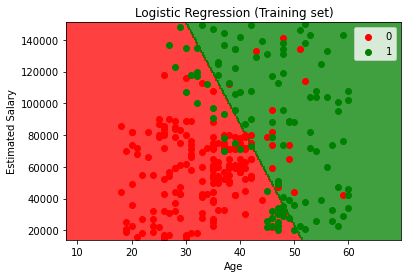

In [5]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train # inverse untuk mengembalikan data ke bentuk asalnya

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=25)) # untuk membuat grid

plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape), # untuk membuat contour
                alpha=0.75, cmap=ListedColormap(('red', 'green'))) # alpha untuk transparansi
plt.xlim(x1.min(), x1.max()) # untuk mengatur batas x dalam grafik
plt.ylim(x2.min(), x2.max()) # untuk mengatur batas y dalam grafik
for i, j in enumerate(np.unique(y_set)): # untuk membuat scatter plot
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


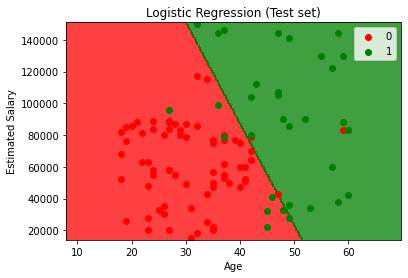

In [6]:
# Visualising the Test set results
# Visualising the Training set results
x_set, y_set = sc.inverse_transform(x_test), y_test # inverse untuk mengembalikan data ke bentuk asalnya

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=25)) # untuk membuat grid

plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape), # untuk membuat contour
                alpha=0.75, cmap=ListedColormap(('red', 'green'))) # alpha untuk transparansi
plt.xlim(x1.min(), x1.max()) # untuk mengatur batas x dalam grafik
plt.ylim(x2.min(), x2.max()) # untuk mengatur batas y dalam grafik
for i, j in enumerate(np.unique(y_set)): # untuk membuat scatter plot
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()